In [1]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from dython import nominal
from sklearn.preprocessing import OrdinalEncoder

In [2]:

df = pd.read_excel('Sense Assurance Dataset.xlsx')

In [3]:
seg=df.copy()
seg = seg.iloc[:,1:]
seg.head(10)

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89
1,1981.0,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13
2,1991.0,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02
3,1990.0,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34
4,1986.0,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45
5,1986.0,60.0,2 - High School,5132.0,4.0,1.0,-24.33,0.998863,440.75,18.90,114.80,7.00,7.67
6,1979.0,73.0,2 - High School,8205.0,4.0,0.0,-66.01,1.050537,156.92,295.60,317.95,14.67,26.34
7,1988.0,42.0,2 - High School,3485.0,4.0,1.0,-144.91,1.131792,248.27,397.30,144.36,66.68,53.23
8,1981.0,38.0,3 - BSc/MSc,3723.0,1.0,1.0,356.53,0.355055,344.51,18.35,210.04,8.78,9.89
9,1976.0,68.0,3 - BSc/MSc,7684.0,1.0,0.0,-119.35,1.124505,209.26,182.25,271.94,39.23,55.12


In [4]:
seg.describe()

,First Policy´s Year,Customer Age,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,10266.000000,10279.000000,10260.000000,10295.000000,10275.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,1991.062634,47.992217,5012.838557,2.709859,0.706764,177.892604,0.742785,300.470252,210.431192,171.580833,41.855782,41.277514
std,511.267913,19.709476,2314.900605,1.266291,0.455268,1945.811545,2.916957,211.914997,352.595984,296.405976,47.480632,51.513572
min,1974.000000,15.000000,665.000000,1.000000,0.000000,-165680.424000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,33.000000,3411.000000,1.000000,0.000000,-9.440000,0.392437,190.590000,49.450000,111.800000,9.890000,10.670000
50%,1986.000000,48.000000,5002.500000,3.000000,1.000000,186.870000,0.720657,298.610000,132.800000,162.810000,25.560000,25.670000
75%,1992.000000,63.000000,6580.250000,4.000000,1.000000,399.777500,0.976811,408.300000,290.050000,219.820000,57.790000,56.790000
max,53784.000000,988.000000,110429.760000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [5]:
seg.isnull().sum()

First Policy´s Year                     30
Customer Age                            17
Educational Degree                      17
Gross Monthly Salary                    36
Geographic Living Area                   1
Has Children (Y=1)                      21
Customer Monetary Value                  0
Claims Rate                              0
Premiums in LOB: Motor                  34
Premiums in LOB: Household               0
Premiums in LOB: Health                 43
Premiums in LOB:  Life                 104
Premiums in LOB: Work Compensations     86
dtype: int64

In [6]:
seg[seg['Premiums in LOB: Household']>10000]

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
8866,1978.0,44.0,2 - High School,5236.0,4.0,1.0,473.54,0.980537,508.43,25048.8,36.23,9.89,11.89


In [7]:
degree= pd.DataFrame(seg.groupby(['Educational Degree'],as_index=True).agg({"Educational Degree": ["count"]}))
degree.columns = degree.columns.droplevel()
degree=degree.reset_index()
degree=degree.sort_values(by='count', ascending=False)
degree=degree.reset_index(drop=True)
degree

,Educational Degree,count
0,3 - BSc/MSc,4799
1,2 - High School,3510
2,1 - Basic,1272
3,4 - PhD,698


In [16]:
matplotlib.use('TkAgg')


In [10]:
%matplotlib inline

In [17]:
sns.countplot(x = 'Educational Degree', data = seg)
plt.show()

In [12]:
age = seg.loc[:,'Customer Age']


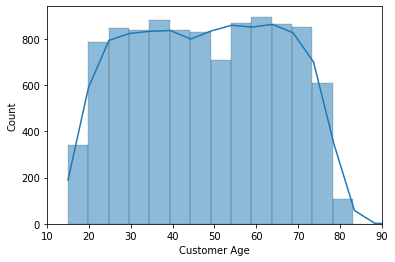

In [13]:
fig, ax = plt.subplots()
sns.histplot(data=seg, x="Customer Age",kde=True,ax=ax,bins=200)
ax.set_xlim(10,90)
plt.show()

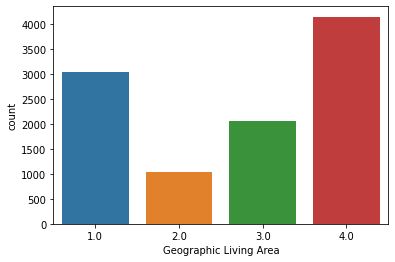

In [14]:
sns.countplot(x='Geographic Living Area',data=seg)
plt.show()

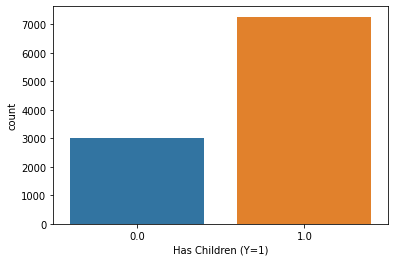

In [15]:
sns.countplot(x='Has Children (Y=1)',data=seg)
plt.show()

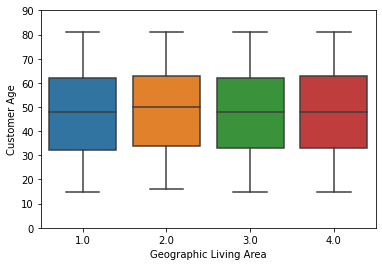

In [16]:
sns.boxplot(x='Geographic Living Area',y='Customer Age',data=seg)
plt.ylim(0, 90)
plt.show()

In [8]:
df_2= seg.iloc[:,8:]


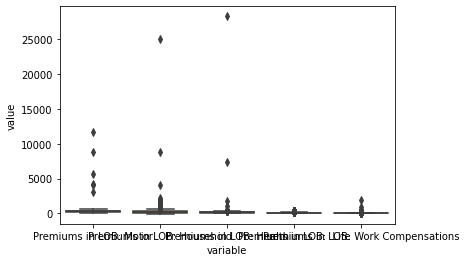

In [18]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_2))
plt.show()

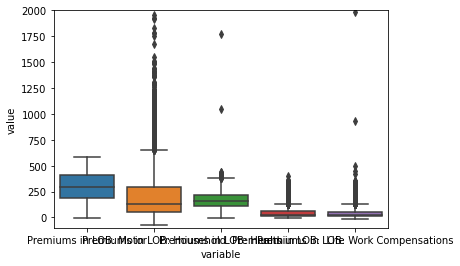

In [19]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_2))
plt.ylim(-100,2000)
plt.show()

In [20]:
claims_by_zone= seg.groupby('Geographic Living Area')['Claims Rate'].mean()
claims_by_zone

Geographic Living Area
1.0    0.717662
2.0    0.687025
3.0    0.771836
4.0    0.760644
Name: Claims Rate, dtype: float64

In [21]:

premiums=seg[['Premiums in LOB: Motor',
       'Premiums in LOB: Household', 'Premiums in LOB: Health',
       'Premiums in LOB:  Life', 'Premiums in LOB: Work Compensations']]
premiums

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,375.85,79.45,146.36,47.01,16.89
1,77.46,416.20,116.69,194.48,106.13
2,206.15,224.50,124.58,86.35,99.02
3,182.48,43.35,311.17,35.34,28.34
4,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...
10291,393.74,49.45,173.81,9.78,14.78
10292,133.58,1035.75,143.25,12.89,105.13
10293,403.63,132.80,142.25,12.67,4.89
10294,188.59,211.15,198.37,63.90,112.91


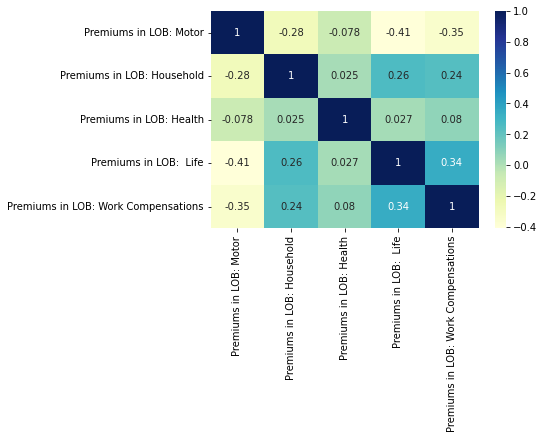

In [22]:
sns.heatmap(premiums.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [16]:
from sklearn.preprocessing import OrdinalEncoder
seg_trans=pd.read_csv('Dataset_GMSalary.csv')


In [17]:
pd.unique(seg_trans['EDegree'])


array(['2 - High School', '1 - Basic', '3 - BSc/MSc', '4 - PhD', nan],
      dtype=object)

In [19]:
data = np.asarray(seg_trans['EDegree'])
data=data.reshape(-1,1)
print(data)


[['2 - High School']
 ['2 - High School']
 ['1 - Basic']
 ...
 ['2 - High School']
 ['4 - PhD']
 ['2 - High School']]


In [14]:
data

array([['2 - High School'],
       ['2 - High School'],
       ['1 - Basic'],
       ...,
       ['3 - BSc/MSc'],
       ['1 - Basic'],
       ['4 - PhD']], dtype=object)

In [20]:
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
res=encoder.fit_transform(data)
res

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [3.],
       [1.]])

In [21]:
res =pd.DataFrame(res)
seg_trans['EDegree'] = res
seg_trans.columns

Index(['Unnamed: 0', 'Id', 'FPYear', 'EDegree', 'GMSalary', 'GLArea',
       'HChildren', 'CMValue', 'CRate', 'PMotor', 'PHousehold', 'PHealth',
       'PLife', 'PCompensations'],
      dtype='object')

In [28]:
seg_trans.head()
#seg_trans.to_excel('C:\\Users\\FilipeSousa\\Desktop\\Challenge-Closer-Academy-\\Project\\Dataset_GMSalary.xlsx')
seg_trans[seg_trans['EDegree'].isnull()]

,Unnamed: 0,Id,FPYear,EDegree,GMSalary,GLArea,HChildren,CMValue,CRate,PMotor,PHousehold,PHealth,PLife,PCompensations
888,896,897,NaN,NaN,5286.000000,1.0,1.0,-25.00,1.000000,515.54,33.90,47.01,12.89,3.78
1698,1707,1708,1992.0,NaN,7653.000000,4.0,0.0,355.52,0.330989,222.71,146.70,0.00,94.13,105.24
2433,2449,2450,NaN,NaN,8930.000000,4.0,0.0,457.75,0.356162,338.73,187.25,175.81,43.23,4.78
2710,2728,2729,NaN,NaN,6399.000000,2.0,0.0,109.25,0.773015,211.93,14.45,275.72,77.68,11.67
2752,2770,2771,NaN,NaN,2945.000000,4.0,1.0,443.74,0.311244,386.74,104.45,156.92,5.00,27.45
3038,3056,3057,NaN,NaN,4441.000000,1.0,1.0,-9.22,0.973787,475.09,15.00,93.35,15.78,2.78
4396,4423,4424,NaN,NaN,5376.000000,1.0,1.0,481.99,0.093041,533.99,-30.00,52.01,3.00,0.00
6496,6535,6536,NaN,NaN,4825.000000,3.0,1.0,420.86,0.281659,472.31,48.35,56.90,26.45,16.67
7278,7321,7322,NaN,NaN,6692.000000,4.0,0.0,173.47,0.731924,139.47,177.80,281.61,120.80,20.67
7425,7470,7471,NaN,NaN,6422.000000,4.0,0.0,261.50,0.661811,213.82,323.95,197.26,37.34,74.79


In [9]:
plt.figure(figsize = (16,5))
sns.heatmap(seg_trans.corr('spearman'),cmap="YlGnBu", annot=True,linewidths=.5)
plt.show()

NameError: name 'seg_trans' is not defined

(0.0, 20000.0)

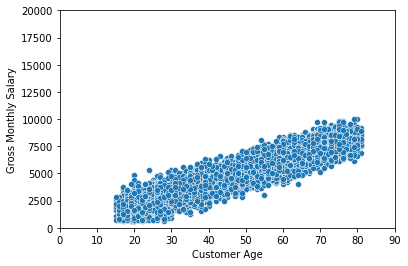

In [30]:
sns.scatterplot(data=seg_trans,x='Customer Age',y='Gross Monthly Salary')
plt.xlim(0,90)
plt.ylim(0,20000)

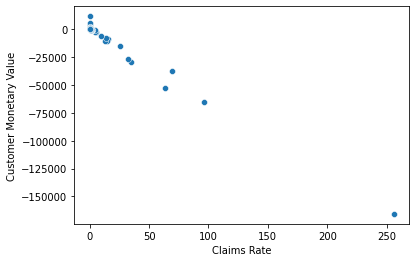

In [31]:
sns.scatterplot(data=seg_trans,x='Claims Rate',y='Customer Monetary Value')
plt.show()




In [32]:
cols = seg_trans.columns # one or more

Q1 = seg_trans[cols].quantile(0.25)
Q3 = seg_trans[cols].quantile(0.75)
IQR = Q3 - Q1

df_final = seg_trans[~((seg_trans[cols] < (Q1 - 3 * IQR)) |(seg_trans[cols] > (Q3 + 3 * IQR))).any(axis=1)]



In [33]:
df_final.describe()

,First Policy´s Year,Customer Age,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,9838.000000,9851.000000,9851.000000,9832.000000,9867.000000,9847.000000,9868.000000,9868.000000,9835.000000,9868.000000,9826.000000,9766.000000,9783.000000
mean,1986.008538,48.737489,1.521673,5085.336961,2.709334,0.709252,213.459994,0.679164,306.258002,189.496732,169.675732,38.063479,37.026652
std,6.603015,16.912793,0.772505,1923.350019,1.265983,0.454131,242.635749,0.316291,132.390094,203.726274,74.413000,39.942979,38.619508
min,1974.000000,15.000000,0.000000,665.000000,1.000000,0.000000,-365.840000,0.000000,1.780000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,34.000000,1.000000,3558.000000,1.000000,0.000000,-8.467500,0.393557,205.260000,48.350000,113.020000,9.890000,9.890000
50%,1986.000000,49.000000,2.000000,5091.000000,3.000000,1.000000,187.090000,0.718891,308.390000,127.800000,164.920000,24.560000,24.670000
75%,1992.000000,63.000000,2.000000,6621.250000,4.000000,1.000000,396.970000,0.975219,412.190000,274.087500,220.930000,54.010000,52.900000
max,1998.000000,81.000000,3.000000,10042.000000,4.000000,1.000000,1254.240000,1.620145,585.220000,1011.850000,442.860000,201.370000,194.590000


In [34]:
df_final.isnull().sum()

First Policy´s Year                     30
Customer Age                            17
Educational Degree                      17
Gross Monthly Salary                    36
Geographic Living Area                   1
Has Children (Y=1)                      21
Customer Monetary Value                  0
Claims Rate                              0
Premiums in LOB: Motor                  33
Premiums in LOB: Household               0
Premiums in LOB: Health                 42
Premiums in LOB:  Life                 102
Premiums in LOB: Work Compensations     85
dtype: int64

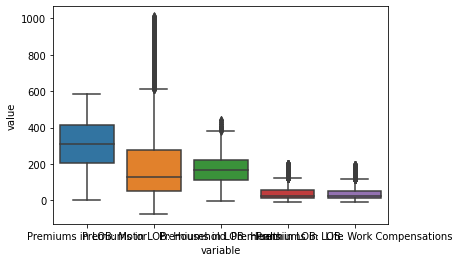

In [35]:
df_3=df_final.iloc[:,8:]
sns.boxplot(x="variable", y="value", data=pd.melt(df_3))
plt.show()

<AxesSubplot:xlabel='Customer Age', ylabel='Count'>

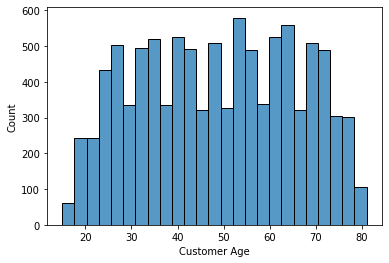

In [36]:
sns.histplot(df_final['Customer Age'])

<AxesSubplot:xlabel='Gross Monthly Salary', ylabel='Count'>

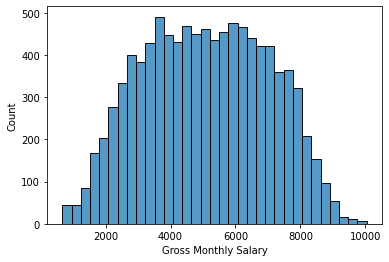

In [37]:
sns.histplot(df_final['Gross Monthly Salary'])

<AxesSubplot:xlabel='Customer Monetary Value', ylabel='Count'>

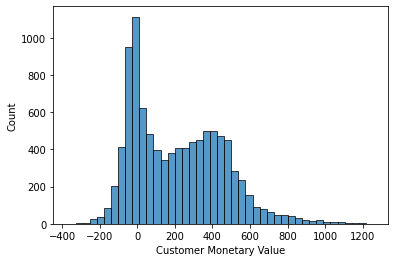

In [38]:
sns.histplot(df_final['Customer Monetary Value'])

<AxesSubplot:xlabel='Claims Rate', ylabel='Count'>

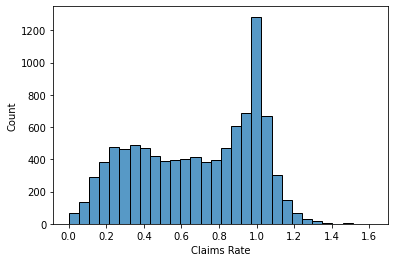

In [39]:
sns.histplot(df_final['Claims Rate'])

<AxesSubplot:xlabel='Premiums in LOB: Motor', ylabel='Count'>

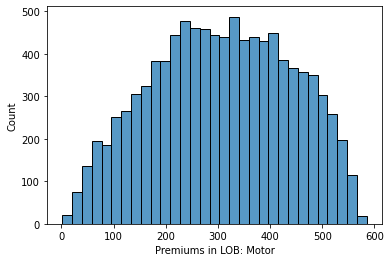

In [40]:
sns.histplot(df_final['Premiums in LOB: Motor'])

<AxesSubplot:xlabel='Premiums in LOB: Household', ylabel='Count'>

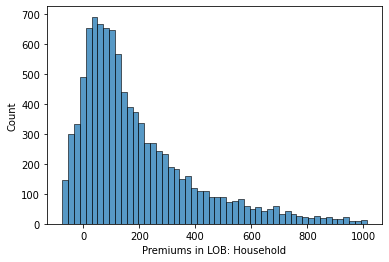

In [41]:
sns.histplot(df_final['Premiums in LOB: Household'])

<AxesSubplot:xlabel='Premiums in LOB: Health', ylabel='Count'>

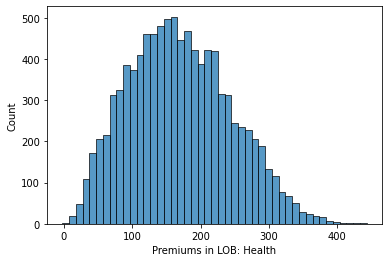

In [42]:
sns.histplot(df_final['Premiums in LOB: Health'])

<AxesSubplot:xlabel='Premiums in LOB:  Life', ylabel='Count'>

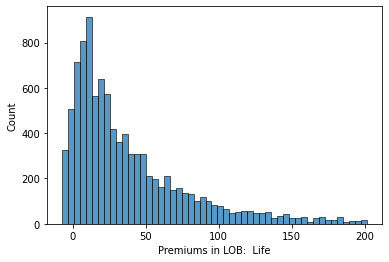

In [43]:

sns.histplot(df_final['Premiums in LOB:  Life'])


<AxesSubplot:xlabel='Premiums in LOB: Work Compensations', ylabel='Count'>

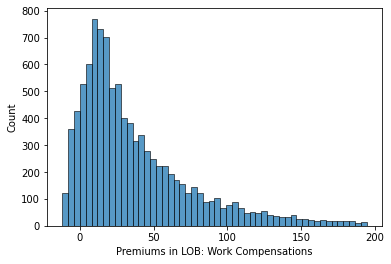

In [44]:
sns.histplot(df_final['Premiums in LOB: Work Compensations'])